In [2]:
import os 
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[]

In [3]:
garbage = os.listdir(r"C:\Users\Dell\Downloads\archive\DATASET")

In [4]:
print(garbage)

['DATASET', 'TEST', 'TRAIN']


In [5]:
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing import image
import numpy as np

In [6]:
#import train data
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.1,
                                   zoom_range = 0.3,horizontal_flip = True,
                                   vertical_flip =  True , 
                                   rotation_range=50,
                                   brightness_range = (0.25, 1.3))


train_data = train_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\archive\DATASET\TRAIN",
                                                 target_size = (150, 150),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)
#import test data

test_datagen = ImageDataGenerator(rescale = 1/255)
test_data = test_datagen.flow_from_directory(r"C:\Users\Dell\Downloads\archive\DATASET\TEST",
                                                           batch_size=25,
                                                           target_size=(150,150),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [7]:
classes= ["Oragnic","Recycle"]

In [8]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = (150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation("softmax"))

In [9]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [11]:
early =  tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="auto")

In [12]:
his = model.fit( train_data,
        epochs=10,
        validation_data = test_data, callbacks = [early])

Epoch 1/10
706/706 [==============================] - 951s 1s/step - loss: 0.4579 - accuracy: 0.7982 - val_loss: 0.3777 - val_accuracy: 0.8400
Epoch 2/10
706/706 [==============================] - 938s 1s/step - loss: 0.4165 - accuracy: 0.8171 - val_loss: 0.3062 - val_accuracy: 0.8758
Epoch 3/10
706/706 [==============================] - 941s 1s/step - loss: 0.4058 - accuracy: 0.8234 - val_loss: 0.3989 - val_accuracy: 0.8420
Epoch 4/10
706/706 [==============================] - 937s 1s/step - loss: 0.3928 - accuracy: 0.8296 - val_loss: 0.3430 - val_accuracy: 0.8651
Epoch 5/10
706/706 [==============================] - 936s 1s/step - loss: 0.3791 - accuracy: 0.8352 - val_loss: 0.3072 - val_accuracy: 0.8818
Epoch 6/10
706/706 [==============================] - 935s 1s/step - loss: 0.3748 - accuracy: 0.8404 - val_loss: 0.3537 - val_accuracy: 0.8611
Epoch 7/10
706/706 [==============================] - 939s 1s/step - loss: 0.3670 - accuracy: 0.8444 - val_loss: 0.3406 - val_accuracy: 0.8587

In [13]:
model.evaluate(test_data)

101/101 [==============================] - 15s 145ms/step - loss: 0.3406 - accuracy: 0.8587


[0.340646892786026, 0.8587346076965332]

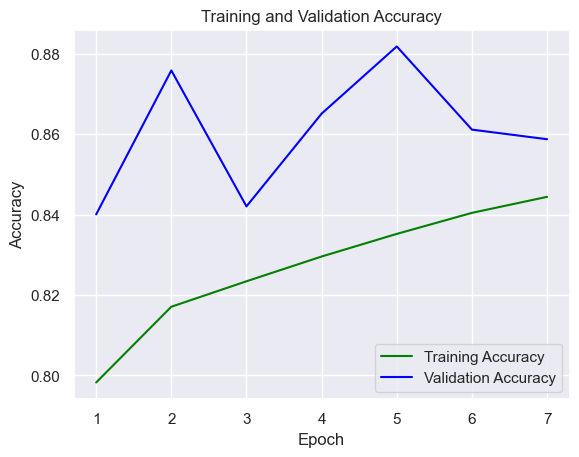

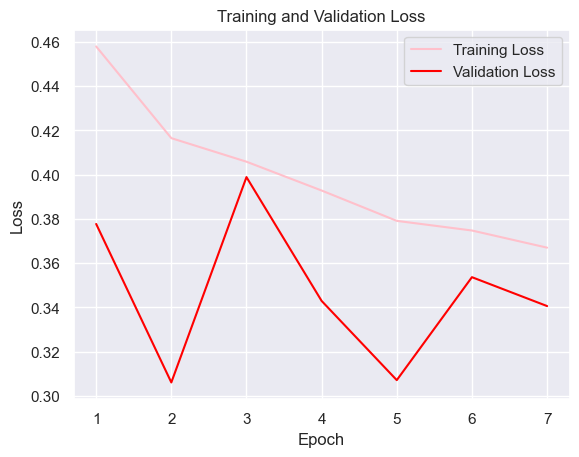

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
from keras.utils import load_img, img_to_array

1/1 [==============================] - 1s 519ms/step
[1]
Recycle


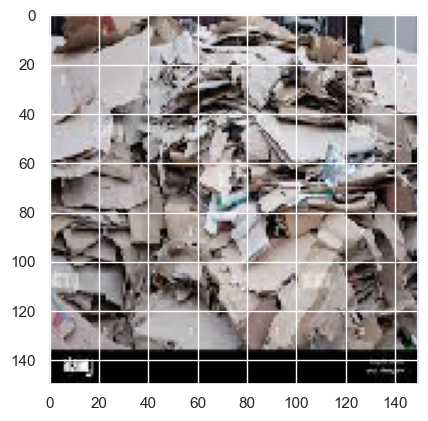

In [22]:
image_path = r"C:\Users\Dell\Downloads\paper_waste.jpeg"
new_img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

1/1 [==============================] - 0s 41ms/step
[0]
Oragnic


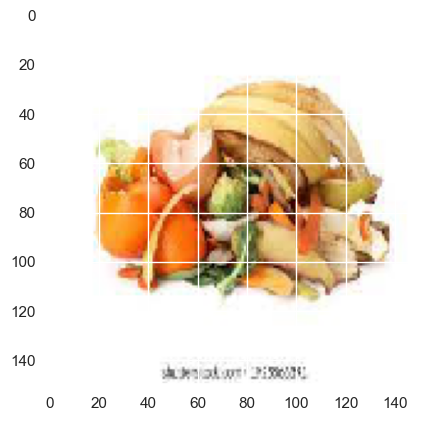

In [28]:
image_path = r"C:\Users\Dell\Downloads\or.jpeg"
new_img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

In [29]:
model.save("Organic VS RECYCLE.h5")

1/1 [==============================] - 0s 339ms/step
[0]
Oragnic


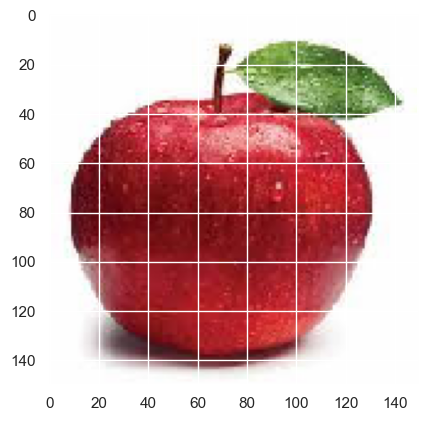

In [30]:
image_path = r"C:\Users\Dell\Downloads\apple.jpeg"
new_img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

In [31]:
model.save("Organic VS RECYCLE.tf")

INFO:tensorflow:Assets written to: Organic VS RECYCLE.tf\assets


INFO:tensorflow:Assets written to: Organic VS RECYCLE.tf\assets
